# Observing with `astroplan`

## I have given you:

* Three locations
* An observing date
* Some target objects

In [52]:
import matplotlib.pyplot as plt

import numpy as np
import astropy.units as u
from astropy.time import Time
import pytz

from astroplan.plots import plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range

from astroquery.simbad import Simbad

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

from astroplan import download_IERS_A
download_IERS_A()

# Set up the locations

* [Google](https://www.google.com/), [Google Maps](https://www.google.com/maps), and [Google Earth](https://www.google.com/earth/) are good resources to find Latitude, Longitude, and Timezones

1. Herwighamna Meteorological Station, Bjørnøya, Svalbard & Jan Mayen
2. Ranui Coastwatch Station, Ranui Cove, New Zealand
3. Wideawake Airfield, Ascension Island

In [26]:
Svalbard = Observer(longitude = 19.039806 * u.deg,
                    latitude = 74.421778 * u.deg,
                    timezone = 'Etc/GMT+1',
                    name = "Svalbard Weather Station")

In [27]:
Ranui = Observer(longitude = 166.271454 * u.deg,
                 latitude = -50.540243 * u.deg,
                 timezone = 'Etc/GMT+12',
                 name = "Ranui Coastwatch Station")

In [28]:
Wideawake = Observer(longitude = -14.402872 * u.deg,
                     latitude = -7.966067 * u.deg,
                     timezone = 'Etc/GMT+0',
                     name = "Wideawake Airfield")

# Determine the UTC time for **Local Noon** at each of the locations

# Observing Date: **Nov 26, 2022**

* You will have to experiment with the `which =` parameter
* Make sure local noon occurs on the observing date

In [29]:
myDate = Time("2022-11-26")

In [30]:
svalbardNoon = Svalbard.noon(myDate, which = "nearest")

In [31]:
print(svalbardNoon.to_datetime(Svalbard.timezone))

2022-11-26 09:30:36.799921-01:00


In [32]:
ranuiNoon = Ranui.noon(myDate, which = "nearest")
print(ranuiNoon.to_datetime(Ranui.timezone))

2022-11-25 12:42:08.087153-12:00


In [33]:
wideawakeNoon = Wideawake.noon(myDate, which = "nearest")
print(wideawakeNoon.to_datetime(Wideawake.timezone))

2022-11-25 12:44:32.504675+00:00


# Determine the length of the observing run at each location

* Length of run is defined by **Astronomical Twilight**
* If your length is negative (or > 24 hr), you have to use a different `which =` parameter above

In [34]:
svalbardTime = Svalbard.tonight(svalbardNoon, horizon = -18 * u.deg)
ranuiTime = Ranui.tonight(ranuiNoon, horizon = -18 * u.deg)
wideTime = Wideawake.tonight(wideawakeNoon, horizon = -18 * u.deg)

In [35]:
print(f'Start observations in Svalbard on the 26th of November at {svalbardTime[0].iso} UTC')
print(f'End observations in Svalbard on the 26th of November at {svalbardTime[1].iso} UTC')

Start observations in Svalbard on the 26th of November at 2022-11-26 15:57:42.250 UTC
End observations in Svalbard on the 26th of November at 2022-11-27 05:06:17.530 UTC


In [36]:
print(f'Start observations in Ranui on the 26th of November at {ranuiTime[0].iso} UTC')
print(f'End observations in Ranui on the 26th of November at {ranuiTime[1].iso} UTC')

Start observations in Ranui on the 26th of November at 2022-11-26 12:04:59.593 UTC
End observations in Ranui on the 26th of November at 2022-11-26 13:19:00.507 UTC


In [37]:
print(f'Start observations in Wideawake Airfield on the 26th of November at {wideTime[0].iso} UTC')
print(f'End observations in Wideawake Airfield on the 26th of November at {wideTime[1].iso} UTC')

Start observations in Wideawake Airfield on the 26th of November at 2022-11-25 20:15:48.033 UTC
End observations in Wideawake Airfield on the 26th of November at 2022-11-26 05:13:34.547 UTC


---
# Set up the Target list

- NGC 6720
- NGC 7191
- NGC 2068
- NGC 2736
- NGC 3242

In [38]:
ngc6720 = FixedTarget.from_name('ngc6720')

In [39]:
ngc7191 = FixedTarget.from_name('ngc7191')

In [40]:
ngc2068 = FixedTarget.from_name('ngc2068')

In [41]:
ngc2736 = FixedTarget.from_name('ngc2736')

In [42]:
ngc3242 = FixedTarget.from_name('ngc3242')

In [43]:
targetList = [ngc6720, ngc7191, ngc2068, ngc2736, ngc3242]
targetList

[<FixedTarget "ngc6720" at SkyCoord (ICRS): (ra, dec) in deg (283.39623652, 33.02913425)>,
 <FixedTarget "ngc7191" at SkyCoord (ICRS): (ra, dec) in deg (331.7157379, -64.63459682)>,
 <FixedTarget "ngc2068" at SkyCoord (ICRS): (ra, dec) in deg (86.69083333, 0.07916667)>,
 <FixedTarget "ngc2736" at SkyCoord (ICRS): (ra, dec) in deg (135.05, -45.95)>,
 <FixedTarget "ngc3242" at SkyCoord (ICRS): (ra, dec) in deg (156.19222313, -18.64230468)>]

----
# What can you see at each location?

## For each location, plot airmass vs. time for all of the targets over the observing night

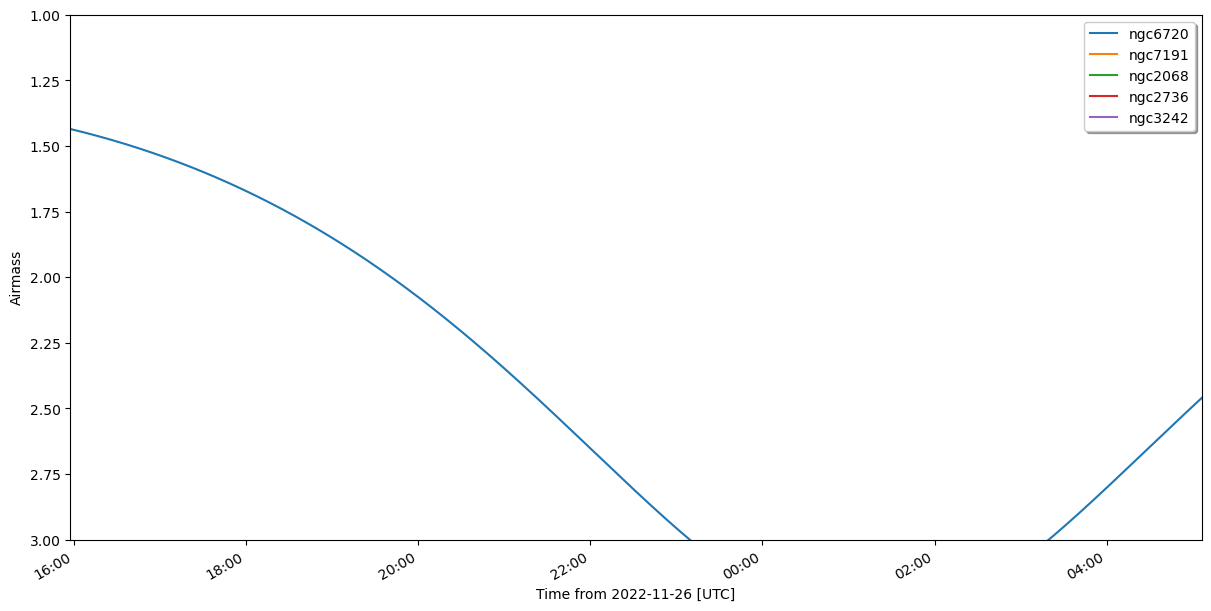

In [44]:
#Svalbard Airmass plots

sTimeGrid = time_grid_from_range(svalbardTime, time_resolution = 0.01 * u.h)

fig, ax = plt.subplots(
    figsize = (12, 6),
    constrained_layout = True
)

#ax = plot_airmass(ngc2736, Svalbard, sTimeGrid)
for observeObject in targetList:
   ax = plot_airmass(observeObject, Svalbard, sTimeGrid)

ax.legend(loc = 0, shadow=True);

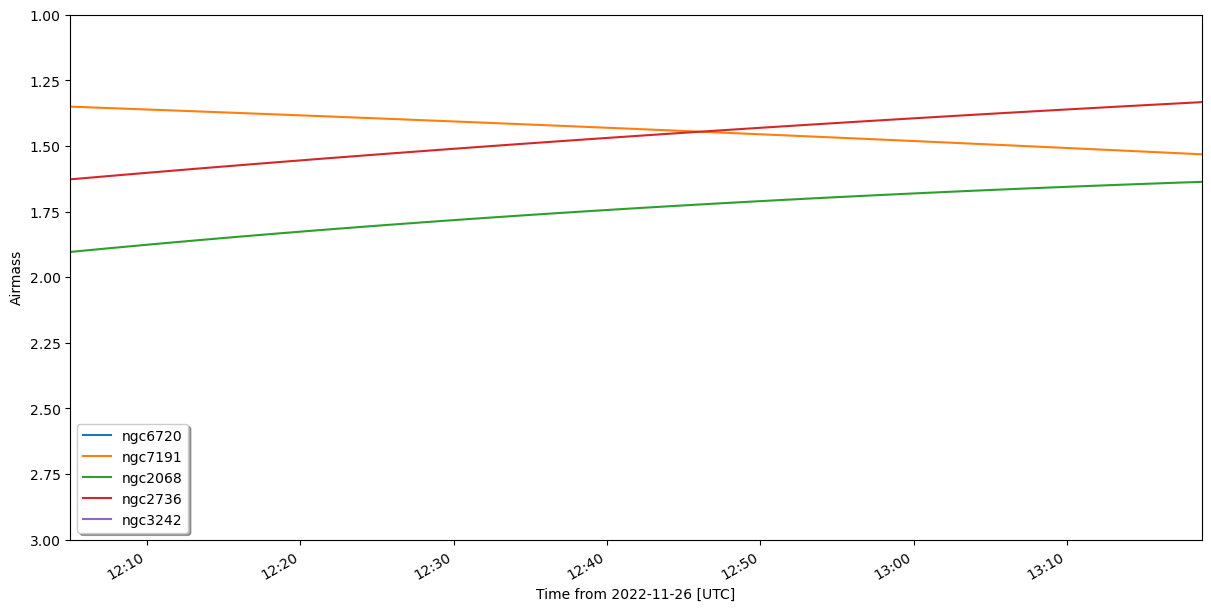

In [ ]:
rTimeGrid = time_grid_from_range(ranuiTime, time_resolution = 0.01 * u.h)

fig, ax = plt.subplots(
    figsize = (12, 6),
    constrained_layout = True
)

#ax = plot_airmass(ngc2736, Svalbard, sTimeGrid)
for observeObject in targetList:
   ax = plot_airmass(observeObject, Ranui, rTimeGrid)

ax.legend(loc = 0, shadow=True);

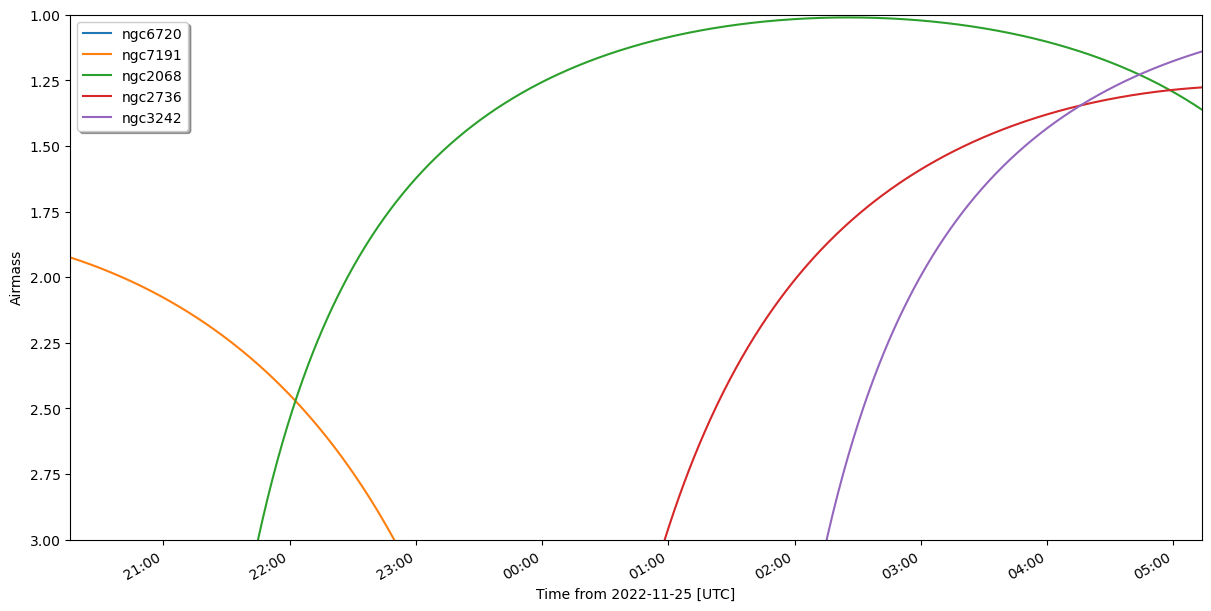

In [ ]:
wTimeGrid = time_grid_from_range(wideTime, time_resolution = 0.01 * u.h)

fig, ax = plt.subplots(
    figsize = (12, 6),
    constrained_layout = True
)

#ax = plot_airmass(ngc2736, Svalbard, sTimeGrid)
for observeObject in targetList:
   ax = plot_airmass(observeObject, Wideawake, wTimeGrid)

ax.legend(loc = 0, shadow=True);

### Due Mon Nov 14 - 1 pm

- `File -> Download as -> HTML (.html)`
- `upload your .html file to the class Canvas page`

# `astroplan` - Constraints

## Add all of the following cells to the bottom of your Observing assignment.

- Re-run all of the cells of your Observing assignment first.
- And then run the cells below.

In [45]:
from astropy.coordinates import SkyCoord
from astroplan import observability_table
from astroplan import AltitudeConstraint, MoonSeparationConstraint, SunSeparationConstraint
from astropy.table import QTable

---

# Targets

* Setup the targets from the data file `./Data/BrightStars_25.csv` and create a target list.
* The columns are:
  - Name
  - RA (hours)
  - DEC (deg)

In [53]:
targetTable = Simbad.query_criteria('region(CIRCLE, Acrux, 10m)', maintype='*')
del targetTable['RA_PREC'], targetTable['DEC_PREC'], targetTable['COO_ERR_MAJA'], targetTable['COO_ERR_MINA'], targetTable['COO_ERR_ANGLE'], targetTable['COO_QUAL'], targetTable['COO_WAVELENGTH'], targetTable['COO_BIBCODE'], targetTable['SCRIPT_NUMBER_ID']
#result
#targetTable = QTable.read('./Data/BrightStars_25.csv', format='ascii.csv')
targetTable['RA'].unit = u.hourangle
targetTable['DEC'].unit = u.deg

In [56]:
targetList = [FixedTarget(coord = SkyCoord(ra = RA, dec = DEC), name = targetName)
           for targetName, RA, DEC in targetTable]

UnitsError: No unit specified

----
## For each of the 3 locations create an `observability_table` with the following constraints


- #### Use the new target list
* Target > 6 hours from Sun
* Target > 60 degrees from Moon
* Target Altitude > 60 degrees

In [49]:
constraints = [SunSeparationConstraint(6 * u.hourangle), MoonSeparationConstraint(60 * u.deg), AltitudeConstraint(min=60*u.deg,max=None)]

list

In [48]:
observingTableSval = observability_table(constraints, Svalbard, targetList, time_range = svalbardTime)
observingTableSval.sort('fraction of time observable', reverse = True)
observingTableSval

target name,ever observable,always observable,fraction of time observable
str7,bool,bool,float64
ngc3242,False,False,0.0
ngc2736,False,False,0.0
ngc2068,False,False,0.0
ngc7191,False,False,0.0
ngc6720,False,False,0.0


In [ ]:
observingTableRanui = observability_table(constraints, Ranui, targetList, time_range = ranuiTime)
observingTableRanui.sort('fraction of time observable', reverse = True)
observingTableRanui

In [ ]:
observingTableWide = observability_table(constraints, Wideawake, targetList, time_range = wideTime)
observingTableWide.sort('fraction of time observable', reverse = True)
observingTableWide

---
## For each Location create a summary paragraph:

- #### If there is more than one target with the same "longest observing time" - just pick one.
- Use `f-string` formatting to make your output look nice
- All floats should be printed to one decimal place
- Replace the CAP values with data. **DO NOT HARDCODE!!** - use variables.

### Location 1

In [ ]:
longestObsSval = observingTableSval['target name'][0]
longestObsRanui = observingTableRanui['target name'][0]
longestObsWide = observingTableWide['target name'][0]

svalStart = Time(svalbardTime[0].iso)
svalEnd = Time(svalbardTime[1].iso)
svalTotal = (svalEnd - svalStart).to(u.h)

ranuiStart = Time(ranuiTime[0].iso)
ranuiEnd = Time(ranuiTime[1].iso)
ranuiTotal = (ranuiEnd - ranuiStart).to(u.h)

wideStart = Time(wideTime[0].iso)
wideEnd = Time(wideTime[1].iso)
wideTotal = (wideEnd - wideStart).to(u.h)

longestSvalTime = observingTableSval['fraction of time observable'][0] * svalTotal
longestRanuiTime = observingTableRanui['fraction of time observable'][0] * ranuiTotal
longestWideTime = observingTableWide['fraction of time observable'][0] * wideTotal

In [ ]:
numberObsSval = len(observingTableSval[observingTableSval['ever observable'] == True])
print(f'On {myDate} at {Svalbard.name} you can observe {numberObsSval} over the observing night. The observing night at {Svalbard.name} is {svalTotal} hours long. The target with the longest time for the observation is {longestObsSval} with a total of {longestSvalTime} hours of observing')

### Location 2

In [ ]:
numberObsRanui = len(observingTableRanui[observingTableRanui['ever observable'] == True])
print(f'On {myDate} at {Ranui.name} you can observe {numberObsRanui} over the observing night. The observing night at {Ranui.name} is {ranuiTotal} long. The target with the longest time for the observation is {longestObsRanui} with a total of {longestRanuiTime} of observing')

### Location 3

In [ ]:
numberObsWide = len(observingTableWide[observingTableWide['ever observable'] == True])
print(f'On {myDate} at {Wideawake.name} you can observe {numberObsWide} over the observing night. The observing night at {Wideawake.name} is {wideTotal} long. The target with the longest time for the observation is {longestObsWide} with a total of {longestWideTime} of observing')

### Due Wed Nov 16 - 1 pm

- `File -> Download as -> HTML (.html)`
- `upload your .html file to the class Canvas page`